# Decision Tree Classification and Evaluation

Mitch Messier Sepetember 7, 2023

# Table of Contents

1. Chunk 1 Set up, data import and inspection code for the following
2. Chunk 2 Target variable
3. Code chunk 3  Data preparation

# Load Libraries

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

# Chunk 1 Set up, data import and inspection code for the following

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/matthewpecsok/4482_fall_2022/main/data/CD_additional_balanced.csv")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
1,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
2,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
3,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
4,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9280 entries, 0 to 9279
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9280 non-null   int64  
 1   job             9280 non-null   object 
 2   marital         9280 non-null   object 
 3   education       9280 non-null   object 
 4   default         9280 non-null   object 
 5   housing         9280 non-null   object 
 6   loan            9280 non-null   object 
 7   contact         9280 non-null   object 
 8   month           9280 non-null   object 
 9   day_of_week     9280 non-null   object 
 10  duration        9280 non-null   int64  
 11  campaign        9280 non-null   int64  
 12  pdays           9280 non-null   int64  
 13  previous        9280 non-null   int64  
 14  poutcome        9280 non-null   object 
 15  emp.var.rate    9280 non-null   float64
 16  cons.price.idx  9280 non-null   float64
 17  cons.conf.idx   9280 non-null   f

In [3]:
data.describe()

NameError: ignored

In [ ]:
data.shape

(9280, 21)

In [ ]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Chunk 2 Target variable

In [ ]:
data.y.value_counts()

yes    4640
no     4640
Name: y, dtype: int64

In [ ]:
data.y.value_counts(normalize=True)

yes    0.5
no     0.5
Name: y, dtype: float64

As we can see in our data set, the distribution of the target variable y is perfectly balanced. Meaning that  there is an equal amount of people that did and did not subscribe to a certified term deposit. This is great for our dataset because we have large amounts of data for both sides of the binary question. With this data, we will be able to run a great model.

In [ ]:
y_target = data.pop('y')

# Code chunk 3 Data preparation

From the metadata file, we can see that job, martial, education, contact, month, day_of_week, and poutcome are are categorical values. On the other hand, we notice age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, and nr.employed are quantitative/numeric.

In [ ]:
categorical_predictors = ['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome']


for predictor in categorical_predictors:
    print(f"Value counts for {predictor}:")
    print(data[predictor].value_counts())
    print("\n")

Value counts for job:
admin.           2517
blue-collar      1769
technician       1459
services          773
management        651
retired           595
student           358
entrepreneur      308
self-employed     306
unemployed        248
housemaid         216
unknown            80
Name: job, dtype: int64


Value counts for marital:
married     5338
single      2900
divorced    1021
unknown       21
Name: marital, dtype: int64


Value counts for education:
university.degree      3007
high.school            2102
professional.course    1190
basic.9y               1177
basic.4y                895
basic.6y                458
unknown                 445
illiterate                6
Name: education, dtype: int64


Value counts for contact:
cellular     6672
telephone    2608
Name: contact, dtype: int64


Value counts for month:
may    2533
jul    1477
aug    1353
jun    1169
nov     886
apr     785
oct     369
mar     313
sep     295
dec     100
Name: month, dtype: int64


Value counts for

In [ ]:
data = data.astype({'job': 'category',
                      'marital': 'category',
                      'education': 'category',
                      'contact': 'category',
                      'month': 'category',
                      'day_of_week': 'category',
                      'poutcome': 'category'})
data.dtypes

age                  int64
job               category
marital           category
education         category
default             object
housing             object
loan                object
contact           category
month             category
day_of_week       category
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
dtype: object

In [ ]:
data_encoded_X = pd.get_dummies(data)
data_encoded_X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,41,1575,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,49,1042,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,49,1467,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,41,579,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,45,461,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


# Chunk 4

In [ ]:
tree_model_1 = tree.DecisionTreeClassifier(random_state=42, ccp_alpha = .10)
tree_model_1

DecisionTreeClassifier(ccp_alpha=0.1, random_state=42)

In [ ]:
tree_model_1 = tree_model_1.fit(data_encoded_X,y_target)

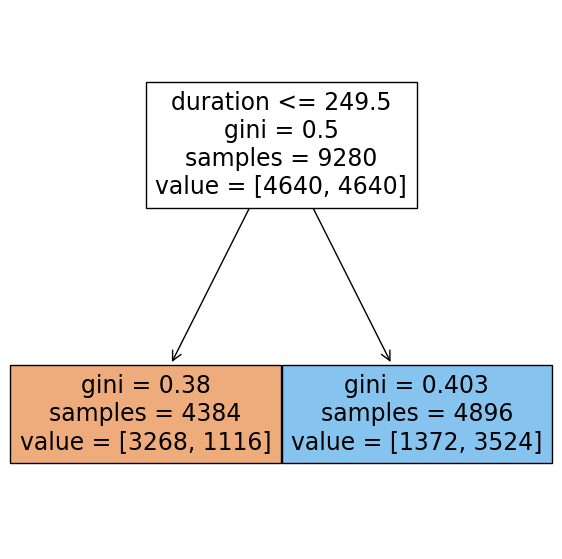

In [ ]:
fig = plt.figure(figsize=(7,7))
_ = tree.plot_tree(tree_model_1,
                   feature_names=data_encoded_X.columns.to_list(),
                   filled=True)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data,y_target, test_size=.3, random_state=42, stratify=y_target)

In [ ]:
tree_model_1 = tree_model_1.fit(x_train,y_train)

ValueError: ignored

In [ ]:
test_pred = tree_model_1.predict(x_test)